In [35]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

plt.style.use('intuitivebayes.mplstyle')
figsize = (25,9)

In [2]:
import pymc.sampling_jax

/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/docs/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [13]:
data = pd.read_csv("data/co2_mm_mlo.csv", header=51)

# Revisiting Art Class
But more abstract

## Drawing with fixed patterns

*insert picture of some drawing with regular pattern

In our previous lessons we were fixed to a specific function, whether it be a line or a sin wave

## Drawing like a child

* Insert a picture of some drawing of a kid

But think about it, why are we constrained to a functional form. Before we got indoctrinated into math we used to all draw like ths

There are different approaches to art and there are different approaches to dfi as well.


## Our C02 Measurements once again

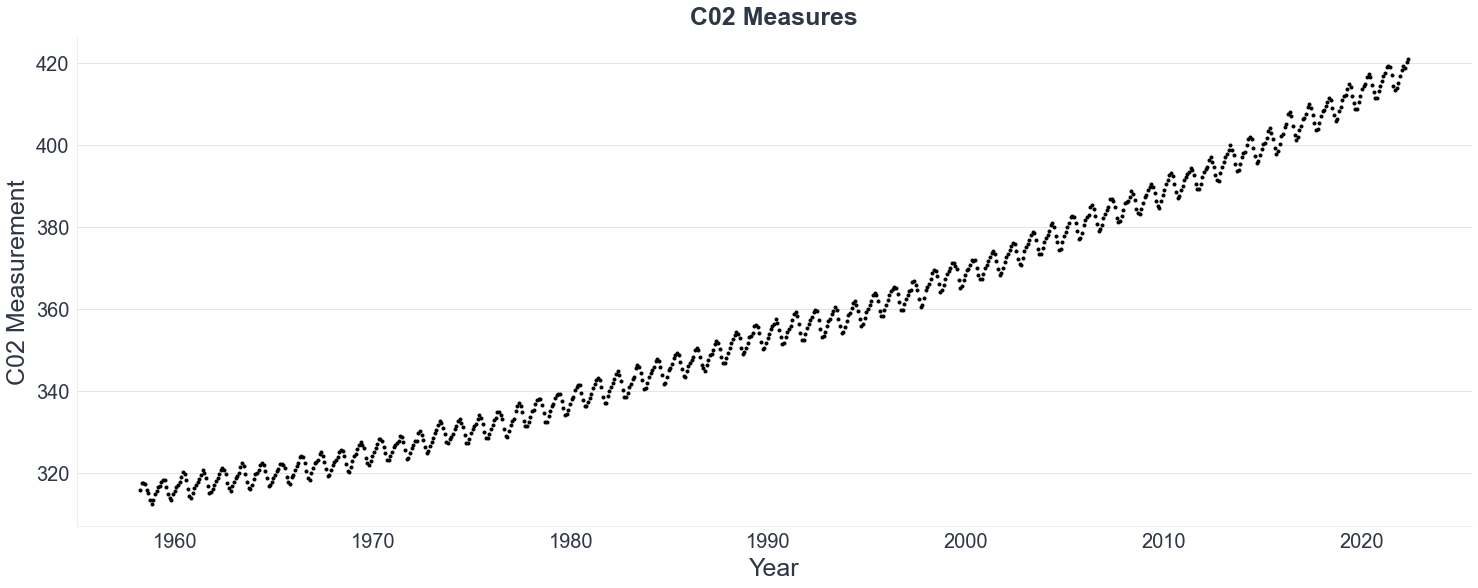

In [62]:
plt.figure(figsize=figsize)
plt.plot(data["decimal date"], data["average"], "k.")
plt.title("C02 Measures")
plt.xlabel("Year")
plt.ylabel("C02 Measurement");


By now you're familiar with this plot and that were trying to fit a curve.
We're going to try drawing things again but  lets think carefully about *how* we are drawing a curve.  T

## Subsetting the data

In [389]:
subset = data.sort_values("decimal date").tail(12)
x = subset["decimal date"].values - subset["decimal date"].min()

<AxesSubplot:title={'center':'Subset of C02 Measures'}, xlabel='Year', ylabel='C02 Measurement'>

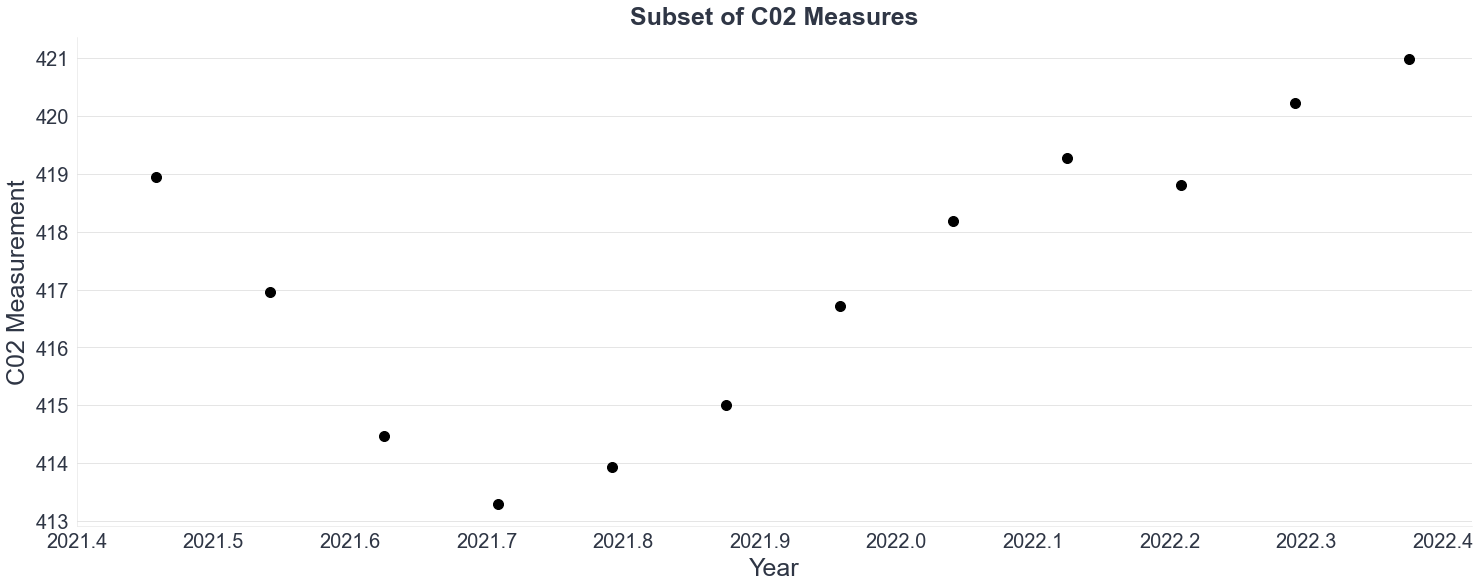

In [315]:
def plot_data():
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set_title("Subset of C02 Measures")
    ax.set_xlabel("Year")
    ax.set_ylabel("C02 Measurement");
    ax.plot(subset["decimal date"], subset["average"], "ok", label="Observed Data", markersize=10)

    ax.plot( )
    ax.set_xticks(np.arange(2021.4, 2022.5, 0.1))
    return ax
plot_data()

Lets focus on the most recent years worth of data. There's nothing special about these 12 data points, we just want to focus in on a part of the data to make things intuitive.

Let's talk about what we can try

- Connect the dots?   No, we shouldn't expect to predict CO2 at every point.  The process by which CO2 gets into the atmosphere is too complicated.  The line we draw shouldn't pass through every point perfectly, but there's clearly some kind of overall pattern happening.
<!-- - If we hit every point, how would we have any uncertainty? -->


## Draw a curve yourself

<AxesSubplot:title={'center':'Subset of C02 Measures'}, xlabel='Year', ylabel='C02 Measurement'>

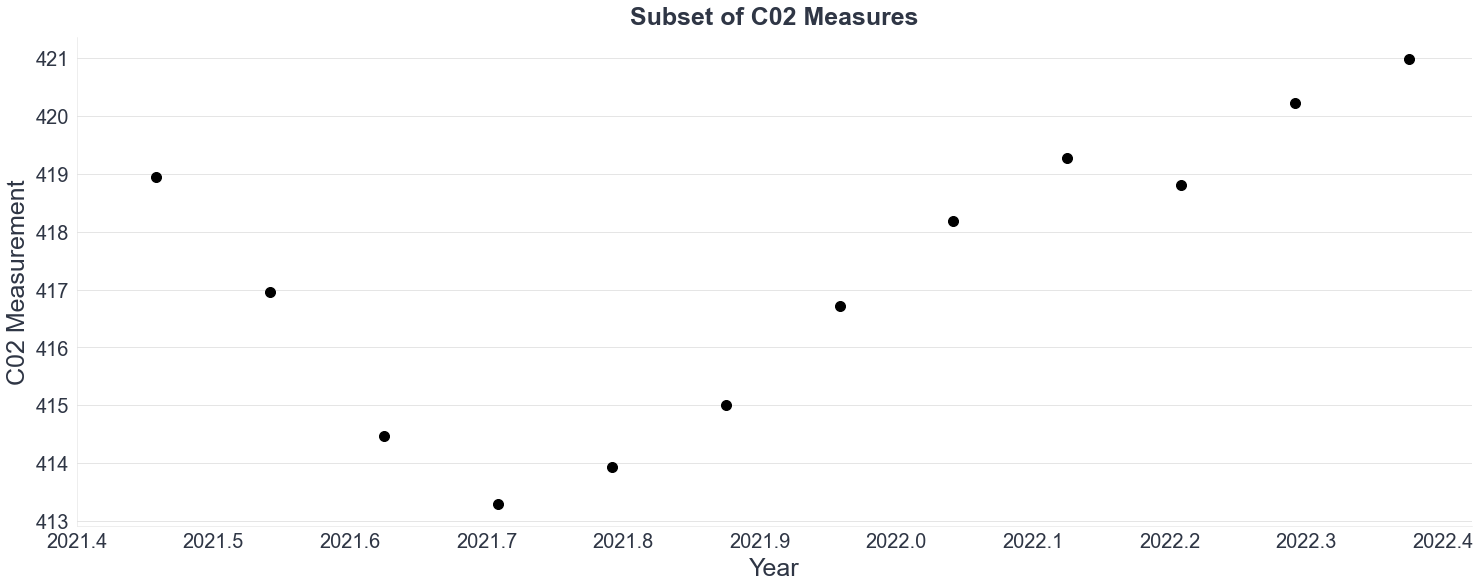

In [313]:
plot_data();

Now you need to do something here. We're going to pause the video here so you can take draw your own curve. Take a screenshot, or print this graph out, and then draw a curve through it. Dont worry about math or code, just think through what you would draw if you were 5 years old.


** Fadi: Pause the video here 5 seconds with a progress bar at the bottom**

Done? Ok great lets move on

## Introducing a new art machine

In [501]:
# this cell is hidden


def exp_kernel(x, x_prime, lengthscale):
    return np.exp(-((x - x_prime) ** 2) / (2 * lengthscale**2))


def simple_art_machine(x, y, x_primes, lengthscale=0.045):

    # .45 is totally arbitrary

    pencil_ys = []

    for x_prime in x_primes:
        weights = exp_kernel(x, x_prime, lengthscale)

        weights_n = weights / np.sum(weights)
        pencil_y = np.sum(y * weights_n)
        pencil_ys.append(pencil_y)

        # Just some formatting to make things nicer to look at
        weights_n = pd.Series(weights_n)
        weights_n.index = x
        weights_n.index.name = "x_value"
        weights_n = weights_n.to_frame()
        weights_n.columns = ["Normalized Weight"]

    return pencil_ys


simple_art_machine(subset["decimal date"], subset["average"], [2022])

[417.4403840891419]

In [308]:
simple_art_machine

<function __main__.simple_art_machine(x, y, x_primes, lengthscale=0.045)>

Now we're going to hand you this new art machine. Lets not worry whats inside for now but lets give some inputs, see some outputs and plot some points to see how it works

## Estimating a C02 measurement for 2021.0

In [479]:
x_val_of_interest = [2022]
estimated_y_val = simple_art_machine(subset["decimal date"], subset["average"], x_val_of_interest)

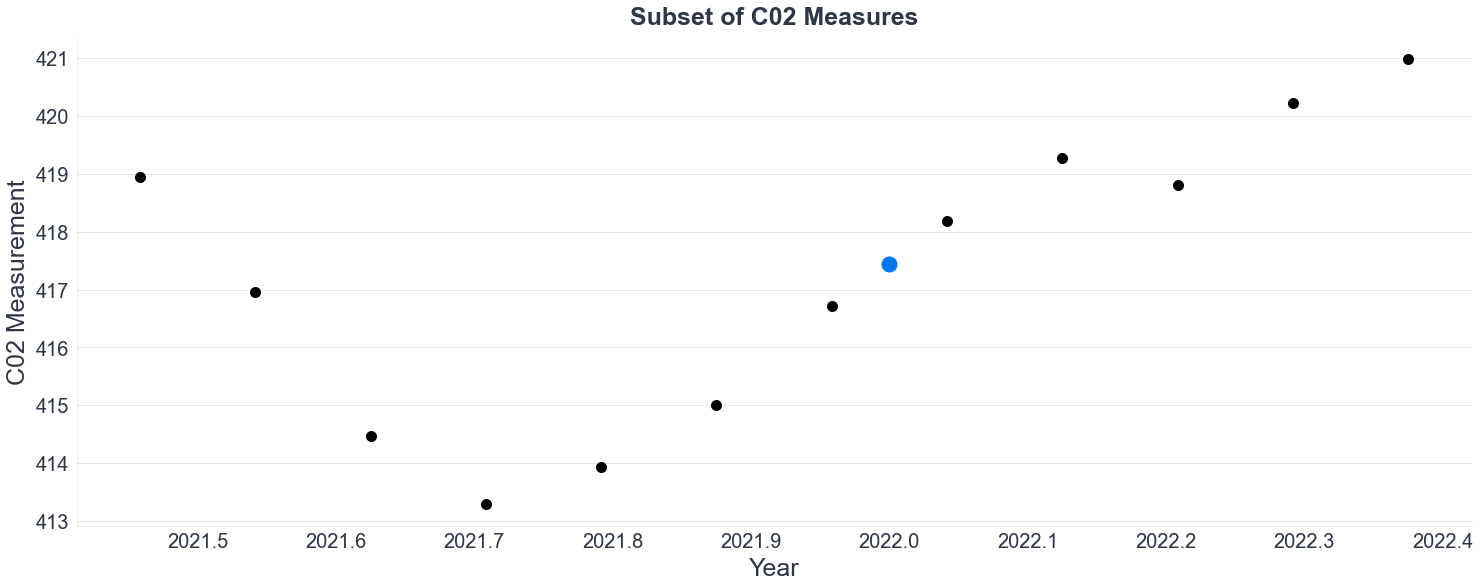

In [363]:
def plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax):
     ax.plot(x_val_of_interest, estimated_y_val, "o", markersize=15); 
        
ax = plot_data()
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax)

Let's start drawing at Jan 1, 2022. There is nothing special about this point, just the one we arbitrarily picked for this class.

We need to give our machine 3 things, an the x and y values of our observed data points, and the point we want to estimate. Intuitively we'd expect this prediction to be somewhere between the points immediately to the left, and the right

## Zooming in

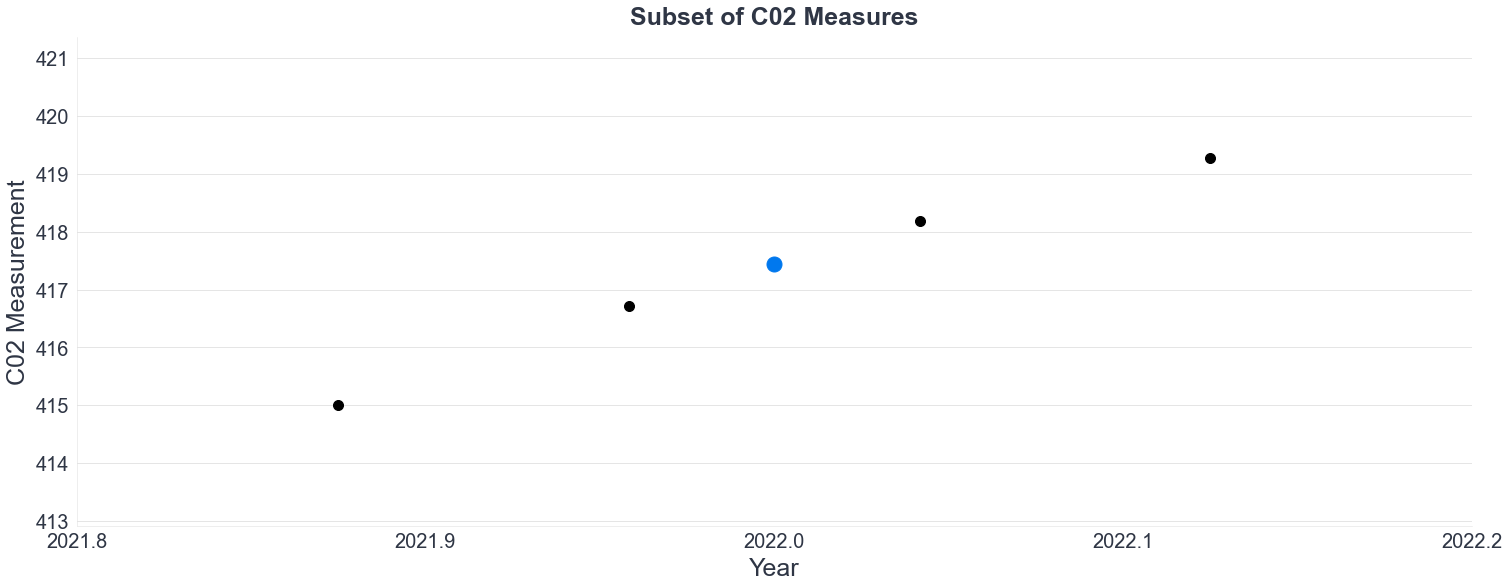

In [430]:
ax = plot_data()
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax)
ax.set_xlim(2021.8, 2022.2);

Lets zoom in some more so we can really see whats happening. Again so far so good, our prediction looks pretty reasonable. Lets extend it

## Drawing a curve

In [323]:
x_vals_of_interest = np.linspace(2021.8, 2022.05, 300)
estimated_y_vals, _ = simple_art_machine(subset["decimal date"], subset["average"], x_vals_of_interest)

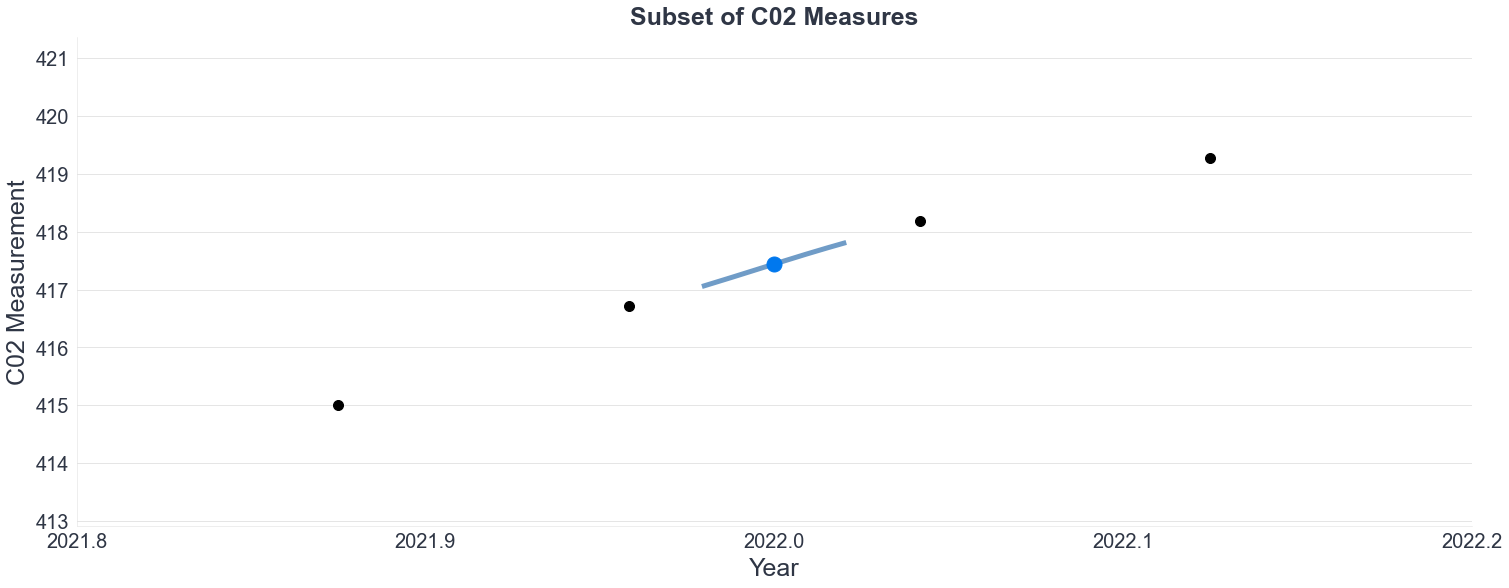

In [480]:
x_vals_of_interest = np.linspace(2021.98, 2022.02, 300)
estimated_y_vals = simple_art_machine(subset["decimal date"], subset["average"], x_vals_of_interest)

def plot_kernel_line(x_vals_of_interest, estimated_y_vals, ax=ax):
    ax.plot(x_vals_of_interest, estimated_y_vals, "-", color="C5", lw=5); 
    return ax
        
ax = plot_data()
plot_kernel_line(x_vals_of_interest, estimated_y_vals, ax=ax)
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax)

xlim = (2021.8, 2022.2)
ax.set_xlim(*xlim);

Now we need to draw a curve, lets  It seems like a completely natural thing, to just trace these lines out, but while drawing let's pay **really** close attention to _HOW_ are we taking the information in the data, and translating that where we are placing this curve.

Let's extend our point both to the left and the right.  For planning out where the curve will go, intuitively clearly the closest data points to the left and right of where we are starting are the most important to consider.  

** Fadi highlight the two closest points**

We are definitely going to draw nearest (in the "y" sense) to the point nearest in the "x" sense, and the direction and slope of our line is determined be the point past it, and the point before we start drawing.  


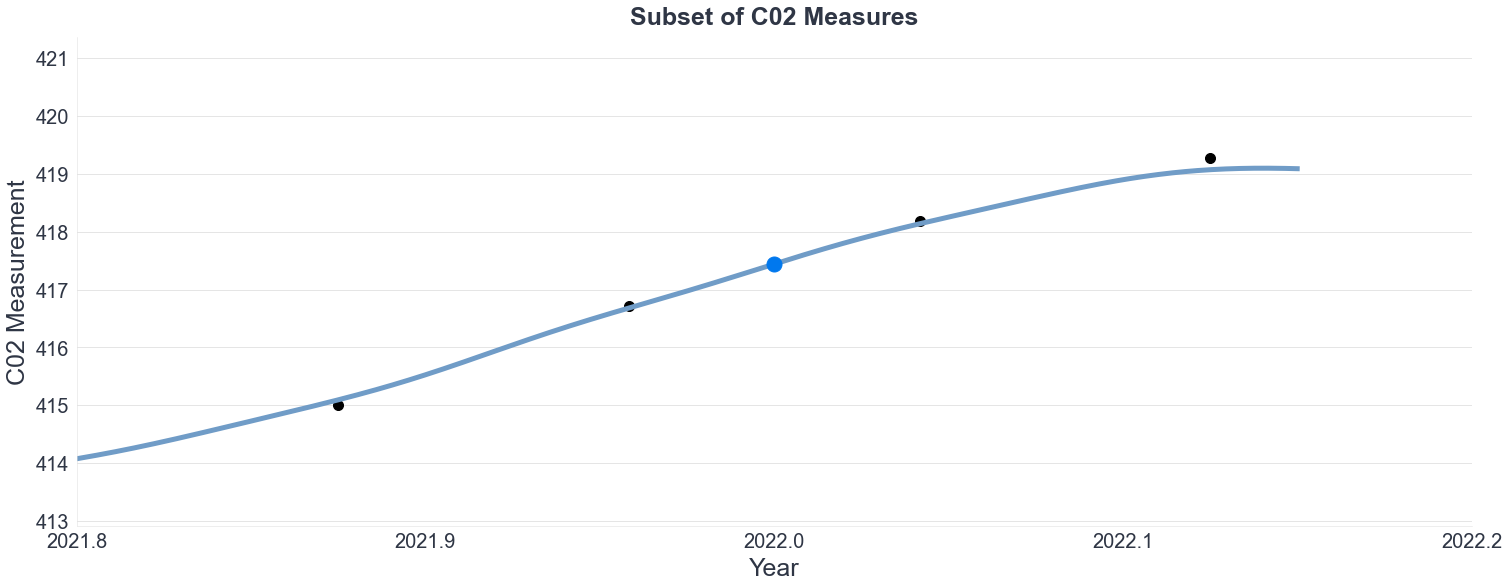

In [481]:
## Lets see if we can animate this

x_vals_of_interest = np.linspace(2021.8, 2022.15, 600)
estimated_y_vals = simple_art_machine(subset["decimal date"], subset["average"], x_vals_of_interest)
        
ax = plot_data()
plot_kernel_line(x_vals_of_interest, estimated_y_vals, ax=ax)
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax)

xlim = (2021.8, 2022.2)
ax.set_xlim(*xlim);

but once we start extending out a bit further things get more interesting, rather than just a straight line the line starts curving

## Zooming back out

In [365]:
x_bounds = 2021.4, 2022.45
x_vals_of_interest = np.linspace(*x_bounds, 600)
estimated_y_vals, _ = simple_art_machine(subset["decimal date"], subset["average"], x_vals_of_interest)
        

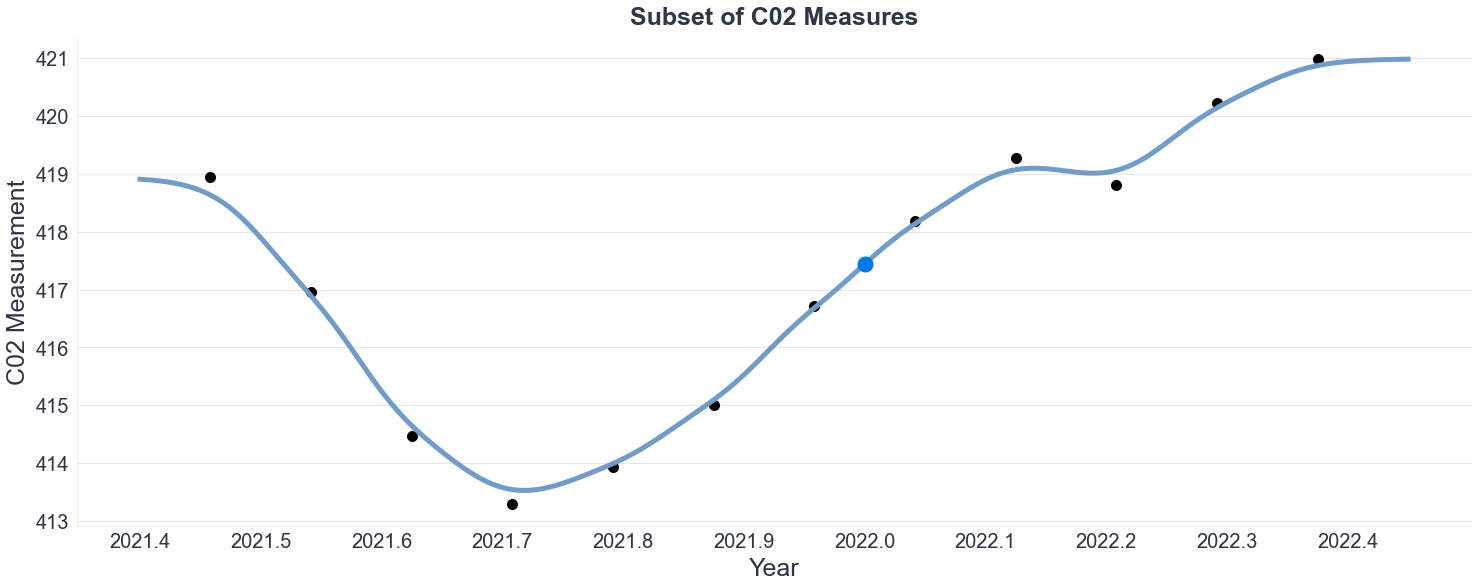

In [366]:
ax = plot_data()
plot_kernel_line(x_vals_of_interest, estimated_y_vals, ax=ax)
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax);

If we extend our curve something incredible happens. Our plotting machine automagically fits the dots. Now it doesn't do it quite exactly fit each out, that would overfitting, but it does it in a way thats much more flexible than our linear additive model earlier.

So you may be asking if this is a GP, the technical answer is no.


Note: Make it an exercise to do fit a Bayesian Line + Sin model and check the fit on this range of data

## More automagic fits

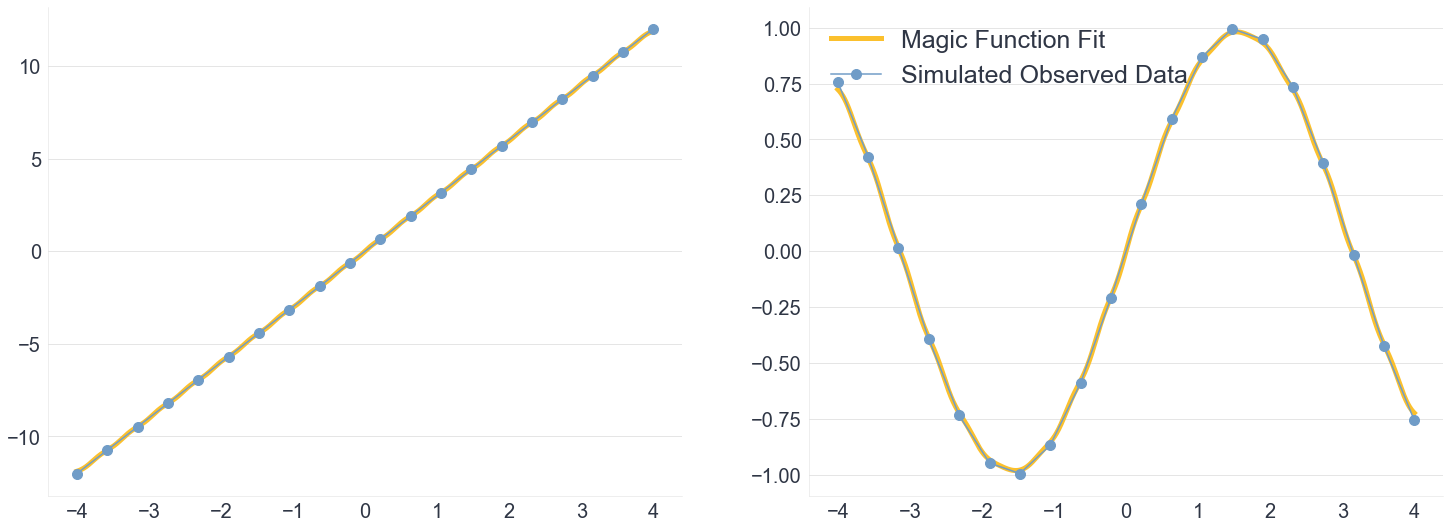

In [468]:
fig, axes = plt.subplots(1,2, figsize=figsize)

def plot_figure(ax, y_func):
    x_obs = np.linspace(-4, 4, 20)
    y_obs = y_func(x_obs)
    
    x = np.linspace(-4, 4, 1000)
    y_estimated = simple_art_machine(x_obs, y_obs, x, lengthscale=.2)

    ax.plot(x, y_estimated, lw=5,c="C1", label="Magic Function Fit")
    ax.plot(x_obs, y_obs, marker="o", c="C5", markersize=10, label="Simulated Observed Data" )

    return

    
plot_figure(axes[0], lambda x: 3*x)
plot_figure(axes[1], lambda x: np.sin(x))
plt.legend();

Our new function is so magical that it can even fit a line and a sine wave with no issues. It's incredible.

But is this a GP? Actually its not

## GP (These next cells are hidden)

In [407]:
### HIDE THIS CODE
# Going to pretend to draw the MAP estimate of this model as what we "draw", but suprise, it's actually a GP.

# Normalize the data to help with sampling
subset = data.sort_values("decimal date").tail(12)
x = subset["decimal date"].values - subset["decimal date"].min()

y_mu = subset["average"].mean()
y_sd = subset["average"].std()
y = (subset["average"].values - y_mu) / y_sd

coords = {'time': subset['decimal date'].values}

with pm.Model(coords=coords) as model:
    
    eta = pm.HalfNormal('eta', sigma=1)
    ell = pm.Gamma('ell', alpha=2, beta=3)
    cov_eq = eta**2 * pm.gp.cov.Exponential(1, ls=ell)
    
    eta_per = pm.HalfNormal('eta_per', sigma=1)
    ell_per = pm.Gamma('ell_per', alpha=2, beta=3)
    cov_per = eta_per**2 * pm.gp.cov.Periodic(1, period=1.0, ls=ell_per)
        
    gp_eq = pm.gp.Marginal(cov_func=cov_eq)
    gp_per = pm.gp.Marginal(cov_func=cov_per)
    
    gp = gp_eq + gp_per
    
    sigma = pm.HalfNormal("sigma", sigma=1)
    lik = gp.marginal_likelihood("lik", X=x[:, None], y=y, noise=sigma, dims='time')
    
with model:
    idata = pm.sampling_jax.sample_blackjax_nuts()

Compiling...
Compilation time =  0:00:01.942834
Sampling...
Sampling time =  0:00:05.799773
Transforming variables...
Transformation time =  0:00:00.202122
Computing Log Likelihood...
Log Likelihood time =  0:00:00.374170


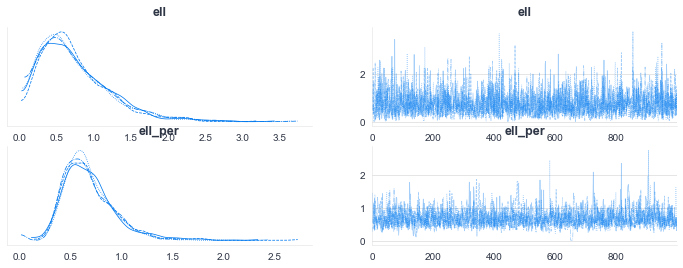

In [408]:
az.plot_trace(idata, var_names=['ell', 'ell_per'], transform=lambda x: x);

In [409]:
xnew = np.linspace(np.min(x) - 1, np.max(x) + 1, 500)
with model:
    f = gp.conditional('f', Xnew=xnew[:, None], jitter=1e-4)
    ppc = pm.sample_posterior_predictive(idata, var_names=['f'])
    
idata.extend(ppc)

In [429]:
def plot_gp(xmin, xmax, ax=ax, figsize=figsize):

    # Get samples from posterior predictive
    f = idata.posterior_predictive.f.stack(sample=['chain', 'draw']).mean(dim='sample')
    gp_posterior = y_sd * f + y_mu 

    # Fix x axis
    x = xnew + subset["decimal date"].min()
    keep_ix = [ix for ix, v in enumerate(x) if xmin < v < xmax]
         
    # Plot GP mean
    ax.plot(x[keep_ix], gp_posterior[keep_ix], lw=8);

    return ax


## This is a Gaussian Process

### Note for bill: Can you add 95% hi to this plot?

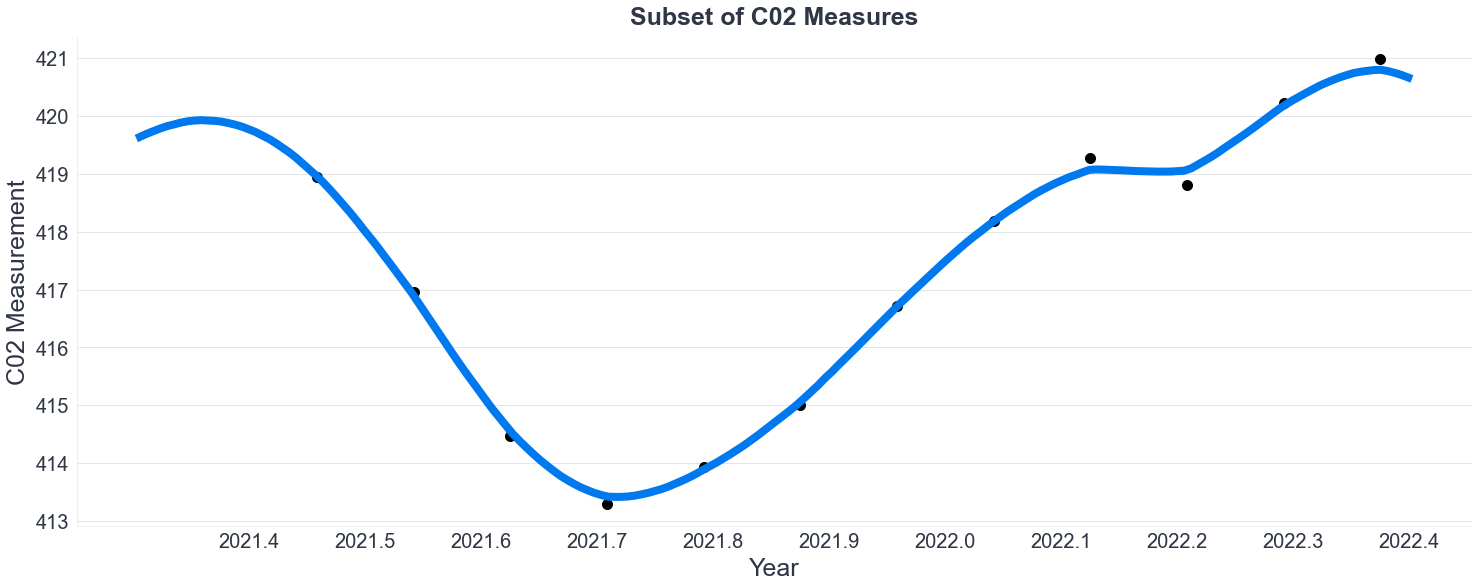

In [428]:
ax = plot_data()
ax = plot_gp(2021.3, 2022.4, ax=ax)

This one is a Gaussian process though, , and so far its been hidden from you. The function we showed you before is a core part of a GP, but is not quite a GP. We know because we know what's under the hood, and soon you will too.

In the next section we'll take a peek under the hood, before going into much more detail in the next lessons

## Section Recap
* If we were to draw things intuitively we'd be much more flexible with our curve
* There exists a function that can draw curves quite flexibly
* To estimate a Y value all you need to pass it are the
  * The observed x and y values
  * A vector of X's you want to estimate
* This (hidden) function is quite flexible

# Our two new art machines
Showing you the code behind in the intuition

## 
** Insert picture of a car

In this last section we took a test drive of our new art machine and the results were incredible. Now were going to take a quick peek under the hood.

This lesson wont be a comprehensive overview

## Our point of interest

In [470]:
x_val_of_interest = [2022]
estimated_y_val, _ = simple_art_machine(subset["decimal date"], subset["average"], x_val_of_interest)

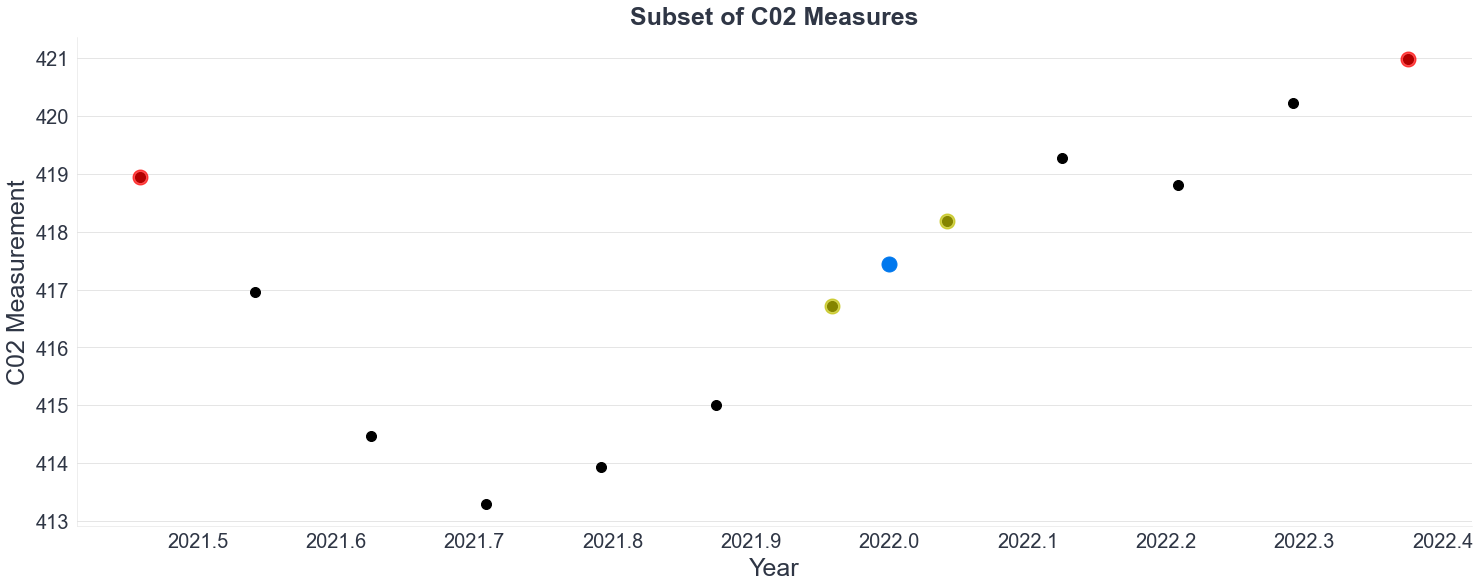

In [492]:
# This cell is hidden
def plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax):
     ax.plot(x_val_of_interest, estimated_y_val, "o", markersize=15); 
        
ax = plot_data()
plot_kernel_point(x_val_of_interest, estimated_y_val, ax=ax)
tmp = data[(data["decimal date"] > 2021.9) & (data["decimal date"] < 2022.1)]
ax.plot(tmp["decimal date"], tmp["average"], "oy", markersize=15, alpha=0.7)

ax.plot(subset.iloc[0]["decimal date"], subset.iloc[0]["average"], "or", markersize=15, alpha=0.7)
ax.plot(subset.iloc[-1]["decimal date"], subset.iloc[-1]["average"], "or", markersize=15, alpha=0.7)



Lets start again with our point of interest. When we asked you to draw a curve yourself, our guess is you looked at these two points are you most immediate reference guide.

And you probably did not look very hard at these points at the very

This makes sense right? The two points at the end aren't very influential, versus the ones that are much closer to our point of interest

**Fadi**: Lets highlight these two points

## Introducing the Kernel function

In [493]:
def exp_kernel(x, x_prime, lengthscale):
    return np.exp(-((x - x_prime) ** 2) / (2 * lengthscale**2))

In [515]:
x_vals.index = subset["decimal date"]
weights = exp_kernel(subset["decimal date"], 2022, .045)
weights

decimal date
2021.4583    3.416703e-32
2021.5417    2.998172e-23
2021.6250    8.323970e-16
2021.7083    7.510098e-10
2021.7917    2.224694e-05
2021.8750    2.110966e-02
2021.9583    6.509284e-01
2022.0417    6.509284e-01
2022.1250    2.110966e-02
2022.2083    2.224694e-05
2022.2917    7.510098e-10
2022.3750    8.323970e-16
Name: decimal date, dtype: float64

Turns out we can use this handy thing called the exponential function to get us those weights. The kernel function takes our point of interest, the observed x values, and a thing called length scale out and outputs a set of weights as shown here.

You'll notice a parameter to this function called lengthscale. This is important! While our new artist is more flexible, it still is a function and requires some parameters, though of a different kind than a coefficient. We'll explain this in more detail in a future 

A kernel function however isn't quite a GP yet

## Your first GP

In [ ]:
subset = data.sort_values("decimal date").tail(12)
x = subset["decimal date"].values - subset["decimal date"].min()

y_mu = subset["average"].mean()
y_sd = subset["average"].std()
y = (subset["average"].values - y_mu) / y_sd

coords = {'time': subset['decimal date'].values}

with pm.Model(coords=coords) as model:
    
    # Linear portion of GP
    eta = pm.HalfNormal('eta', sigma=1)
    ell = pm.Gamma('ell', alpha=2, beta=3)
    cov_eq = eta**2 * pm.gp.cov.Exponential(1, ls=ell)
    
    # Periodic Component
    eta_per = pm.HalfNormal('eta_per', sigma=1)
    ell_per = pm.Gamma('ell_per', alpha=2, beta=3)
    cov_per = eta_per**2 * pm.gp.cov.Periodic(1, period=1.0, ls=ell_per)
        
    gp_eq = pm.gp.Marginal(cov_func=cov_eq)
    gp_per = pm.gp.Marginal(cov_func=cov_per)
    
    gp = gp_eq + gp_per
    
    sigma = pm.HalfNormal("sigma", sigma=1)
    lik = gp.marginal_likelihood("lik", X=x[:, None], y=y, noise=sigma, dims='time')

    idata = pm.sampling_jax.sample_blackjax_nuts()

This however is a Gaussian Process implemented in PyMC. In this GP we include the kernel function, we just saw, as well as things we'd expect from a Bayesian model such as a prior and likelihood. 

Additionally in this particular GP we have the best of both world's as like our earlier linear + sin wave model we have an additive GP here as well.

If this seems overwhelming thats great. It means youre paying attention. In the next lessons we'll break this GP down and build it back up one piece at a time.

For how lets close out this section and move onto the lesson summary

## Section Summary
* Gaussian Processes work by weighting data points
* Gaussian Processes are composed of many parts from
  * Priors
  * Kernels 
* They can be added 

# WIP Lesson Summary

## Section 10
* Wanted to model the Mauna Loa dataset
* Started with a linear function
* needed to estimate parameters and used
  * Guessing
  * Orindary Least Square
  * Bayesian estimation
* Even with the best parmaters the model was missing nuance
  * A plain linear model can only draw lines

## Section 20
* Added a sine wave to our model
* Fit was better but again still couldn't capture full nuance
  * The periodicity was non regular
  * Sin wave didn't account for slight non linear growth

## Section 30
* Intuitively drew curve without worrying about math
* Showed a magic function that was able to flexibly model the data
  * Was even able to model a line and a sin wave with no changes to the function

## Section 40
* Briefly showcased the intuition behind our function
  * Weight closer data more heavily
  * Far data less heavily
* Saw our first Gaussian Process model

# Appendix
For the rest of this stuff we should save it for the Kernel/GP Lesson

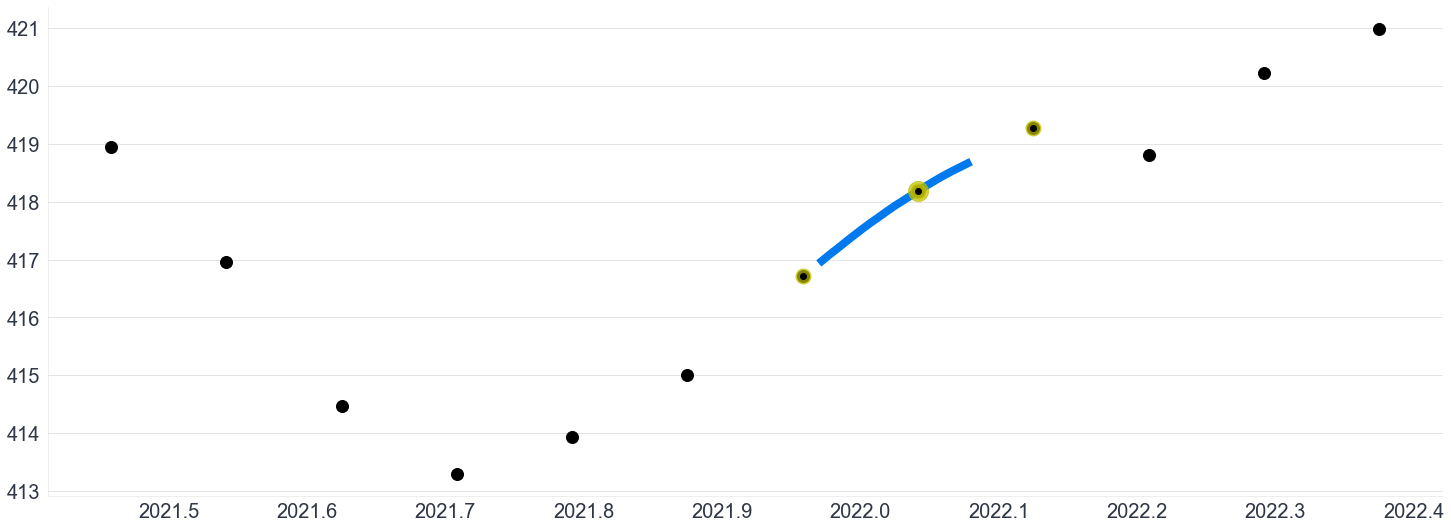

In [94]:
ax = plot_range(2021.97, 2022.08)

tmp = data[(data["decimal date"] > 2022.0) & (data["decimal date"] < 2022.1)]
ax.plot(tmp["decimal date"], tmp["average"], "oy", markersize=20, alpha=0.7);

tmp = data[(data["decimal date"] > 2021.9) & (data["decimal date"] < 2022.2)]
ax.plot(tmp["decimal date"], tmp["average"], "oy", markersize=15, alpha=0.7);
ax.plot(tmp["decimal date"], tmp["average"], "ok");

Let's think if there is a rule or algorithm we can express mathematically for what we are doing here.  In a rough sense, we 
1. Pick a starting point
2. Find the closest three data points (closest in terms of "x")
3. "Sort of" draw a line using the "y" values as guideposts
  *  This one is fuzzier

This isn't quite enough.  To make an algorithm or mathematical model, we need to be specific.  Point 3 is not specific enough, but lets roll with it anyway and see where we end up.

Is this enough?  To help visualize, lets just look at these three data points and ask, if we just see these three and not the rest, would we still draw the same line?

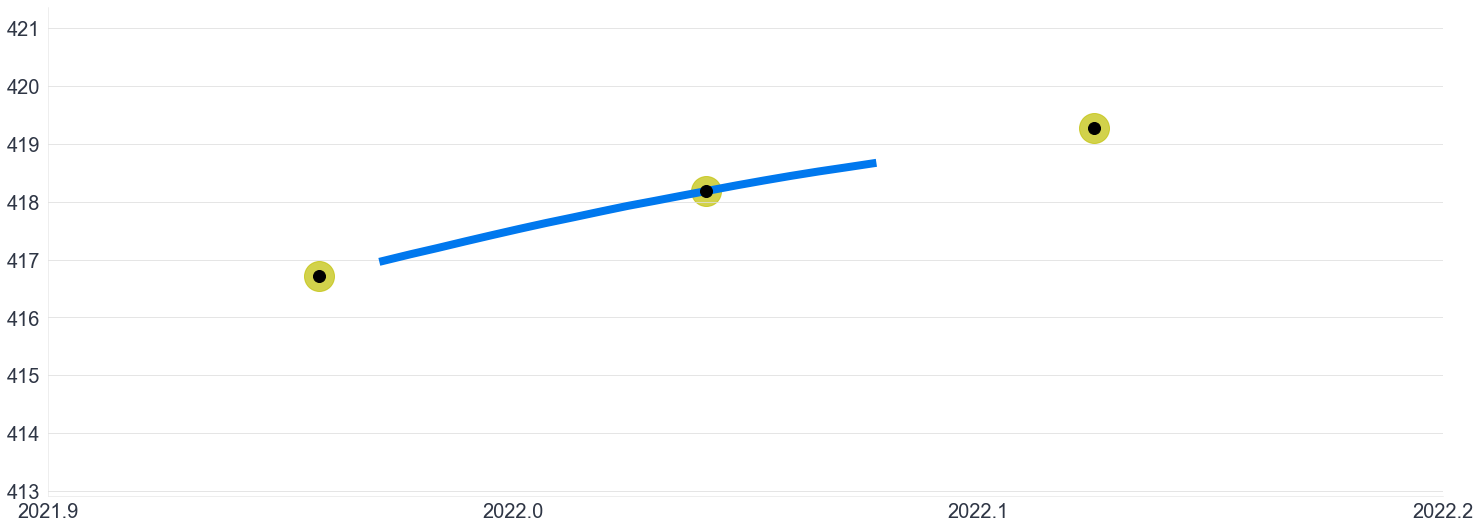

In [124]:
# Temp Note for bill
# Simplify the code as much as possible. Students will look into it and the more there is the more confusing
# It will get for them

ax = plot_range(2021.97, 2022.08)

tmp = data[(data["decimal date"] > 2021.9) & (data["decimal date"] < 2022.2)]
ax.plot(tmp["decimal date"], tmp["average"], "oy", markersize=30, alpha=0.7, zorder=-2);

ax.set_xlim([2021.9, 2022.2]);

Looking at these, the answer is "Maybe?".  But what if then we saw another point here (red):

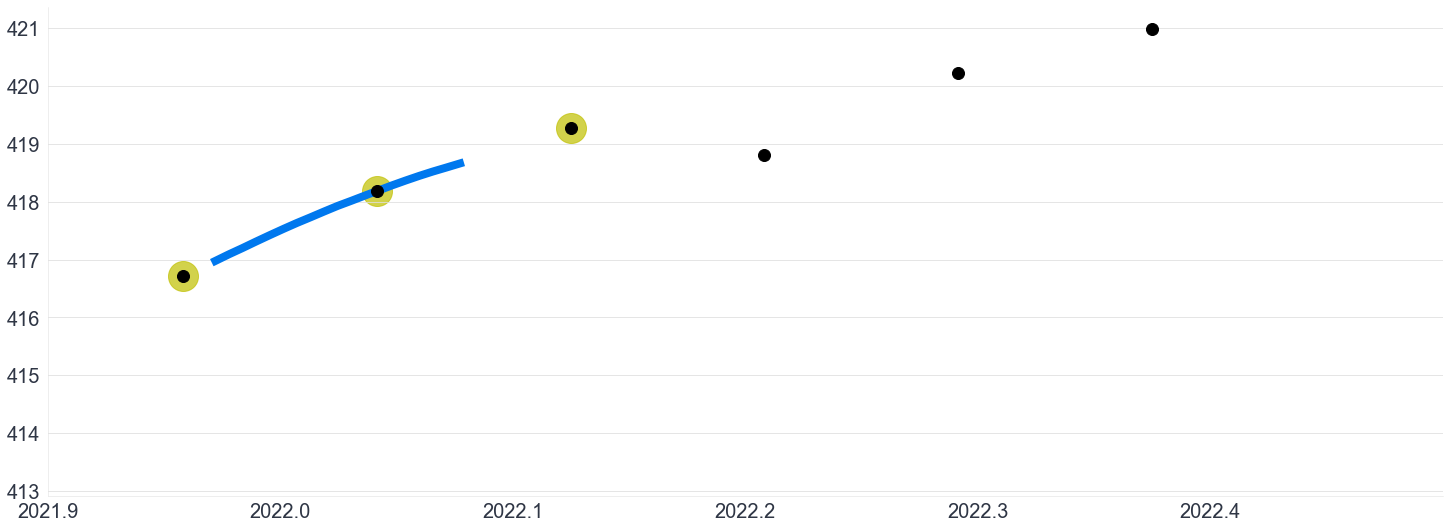

In [133]:
ax = plot_range(2021.97, 2022.08)

tmp = data[(data["decimal date"] > 2021.9) & (data["decimal date"] < 2022.2)]
ax.plot(tmp["decimal date"], tmp["average"], "oy", markersize=30, alpha=0.7, zorder=-2);

ax.set_xlim([2021.9, 2022.5]);

The blue line heading to the left should probably start bending a little sooner than it is to the new red point, and probably shouldn't pass through the datapoint that it's about to run into.  

### Digression, expanding on step 2

How do we think about this then?  Maybe our rule of 3 isn't good enough.  Maybe we need to consider more data points.  But clearly, the data points closer to where we are drawing are more important than ones further away, so let's *weight them based on how far away they are from the pencil*.  From our starting point on Jan 1, 2022, let's give every other data point a weight, ranging from 1, most important, to 0, not important at all.  For a datapoint to get a 1, it would have to be exactly at Jan 1, 2022.  For a data point to get a zero, it would have to be infinitely far away. 

**It's easier to design a mathematical formula to do this for us, instead of just coming up with weight values that look right based on the chart**  What if we had a thousand data points to do this for!

We'll need a few pieces to construct our formula:
- The location of our pencil, $x'$
- To make this general to any dataset, let's define distance from our pencil to any point on the x axis (not just the data points we have above at their discrete locations), $x - x' $.  We need the distance to always be positive, so let's square it, $d = (x - x')^2$.
- Right now the distance goes from 0 (super close) to $\infty$ (super far).  We want to scale it to go from 1 (super close) to zero (super far).  All we have to do is transform it using the exponential function, and make the exponent negative,
$$
k(x, x') = \exp(-d) = \exp( -(x - x')^2 )
$$
- If you've seen GPs before, you might be starting to recognize this function!  If not, don't worry, we'll experiment with functions like this much more.  

It might feel like there's a lot to unpack here, but let's remember our goal:  **We want a way to "weight" different data points for when we draw a line, based on where our pencil currently is**.  We intuitively know how to draw a line through some dots, to the point where it feels so easy that you don't even think about *how* you're actually doing it.  In order to be precise, and to make this intuition "implementable" by a computer for any kind of data, we need to represent this intuition into a bit of math.  


Looking at the above figure, our pencil is at zero, and this gives us the "similarity" of its "y" value, using the distance of other points on "x".  We'll weight each of the $y$ values according to our similarity function, and then sum them to get a weighted average of y values. 

Try this yourself!  Make a small table of (x, y) coordinates (you pick), and see how we can use our similarity function to automatically let us automatically draw in reasonable values.  Here's an example:

In [179]:
tmp = data[(data["decimal date"] > 2021.9) & (data["decimal date"] < 2022.3)]
tmp

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
765,2021,12,2021.9583,416.71,417.44,28,0.48,0.17
766,2022,1,2022.0417,418.19,417.82,29,0.73,0.26
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34
768,2022,3,2022.2083,418.81,417.34,30,0.78,0.27
769,2022,4,2022.2917,420.23,417.55,28,0.85,0.31


In [180]:
list(tmp[["decimal date", "average"]].itertuples(index=False, name=None))

[(2021.9583, 416.71),
 (2022.0417, 418.19),
 (2022.125, 419.28),
 (2022.2083, 418.81),
 (2022.2917, 420.23)]

In [183]:
k = lambda x, x_prime: np.exp(-(x - x_prime)**2)
k = lambda x, x_prime, lengthscale: np.exp(-(x - x_prime)**2 / (2 * lengthscale**2) )

x_prime = 2022 # we want to fill in where our pencil is, at x = 2022
weights = k(x, x_prime, .1)
weights

array([0.91672797, 0.91672797, 0.45783336, 0.11424106, 0.01420098])

In [186]:
np.sum(weights)

2.4197313444137465

In [187]:
# notice that our weights don't sum to 1!  So lets just normalize them so that they do
weights_n = weights / np.sum(weights)

# now we can weight our "y" values so they sum to 100%

In [184]:
weights

array([0.91672797, 0.91672797, 0.45783336, 0.11424106, 0.01420098])

In [188]:
pencil_y = np.sum(y * weights_n)

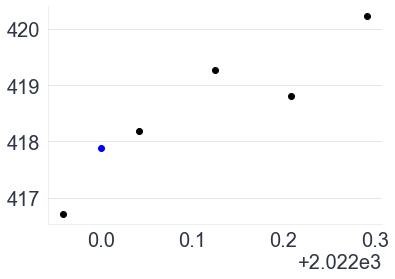

In [189]:
plt.plot(x, y, 'ok');
plt.plot([x_prime], [pencil_y], "bo");

Looks reasonable!  Let's do a bunch in for loop, as if our pencil is drawing:

420.22999922014554

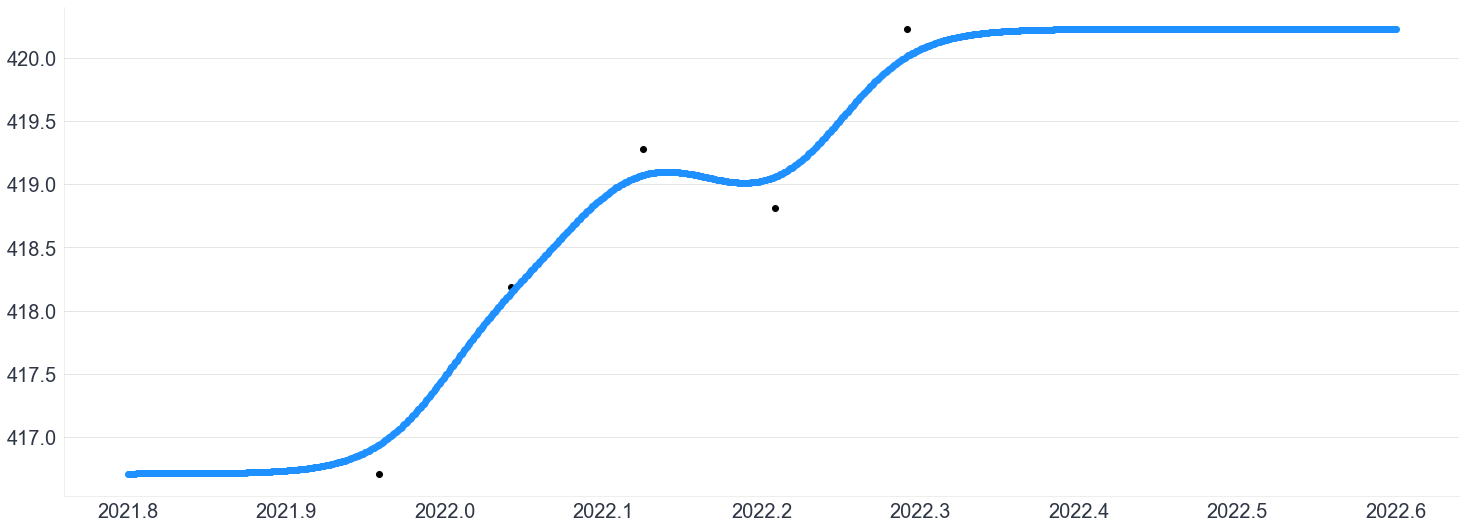

In [247]:
fig = plt.figure(figsize=figsize)
ax = fig.gca();

ax.plot(x, y, 'ok');

x_primes = np.linspace(2021.8, 2022.6, 1000)

# x_primes = np.linspace(0.5, 4.8, 30)

for x_prime in x_primes:  ## animate this?
    weights = k(x, x_prime, .045)
    weights_n = weights / np.sum(weights)
    pencil_y = np.sum(y * weights_n)
    
    ax.plot([x_prime], [pencil_y], "o", color="dodgerblue")

    
pencil_y

We almost got a real GP going here!  We are about here:

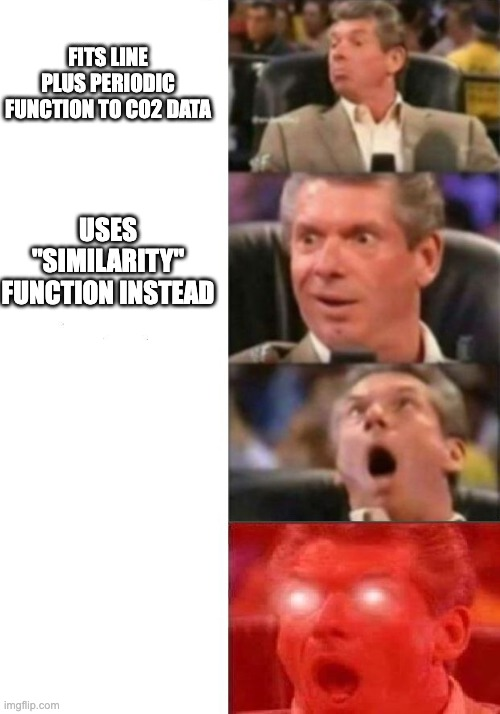

## Main idea

Earlier we spent a lot of time coming up with specific functional forms directly for the CO2 process -- the linear plus sine model.  The reason we did that was to compare that way of modeling with the alternative approach that Gaussian processes use.  Writing down a similarity function is an **entirely alternative way** to model the data.  Often a much more natural and informative way, as we'll see later in the course.  

## Summary

There's still a ways to go until we get to a full fledged Gaussian process, with uncertainty estimates and everything.  But this is really the essence of *how* GPs are work to model data under the hood.  Let's review our algorithm we had earlier, we can make it much more specific now:

#### Old version:

1. Pick a starting point
2. Find the closest three data points (closest in terms of "x")
3. This one is fuzzier, we sort of draw a line using the "y" values as guideposts.


#### Updated:

1. Pick a starting point, call it $x'$.
2. Calculate the "similarity" weights between $x'$ and all the other $x$ locations in the data.
3. Normalize so they sum to 100\%, then apply weights to the corresponding $y$ values.  Sum to get an estimate of $y' = f(x')$.

Then repeat for any other $x'$ you need!

#### Heads up:
- Although we used the metaphor of drawing, we don't need to actually put a marker down, and then "move" from that marker left to right.  We can just pick any arbitrary $x'$ points and get estimates for them this way.  

### Back to Mauna Loa

Let's finish drawing in our line using our new proto-GP method!  Should be easy now right?

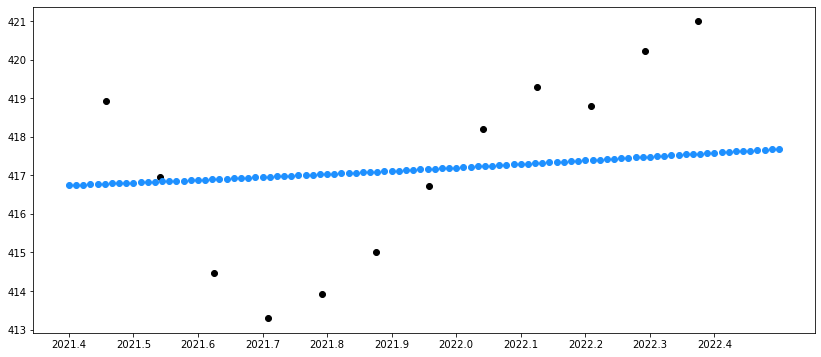

In [31]:
subset = data.sort_values("decimal date").tail(12)

x = subset["decimal date"].values
y = subset["average"].values

fig = plt.figure(figsize=(14, 6))
ax = fig.gca()

ax.plot(x, y, "ok")
ax.set_xticks(np.arange(2021.4, 2022.5, 0.1))


x_primes = np.linspace(2021.4, 2022.5, 100)

for x_prime in x_primes:  ## animate this?
    weights = k(x, x_prime)
    weights_n = weights / np.sum(weights)
    
    pencil_y = np.sum(y * weights_n)
    
    ax.plot([x_prime], [pencil_y], "o", color="dodgerblue")

What went wrong?!  We need one last finishing touch to make this something usable.  

Let's add another parameter that "standardizes" the distance between $x$ and $x'$.  What if our data is between x = 0 and x = 0.1?  Maybe we still want the distance from x = 0 and x = 0.1 to feel "far".  Or what if our data is between 500 and 50,000, and the distance between 700 and 800 is "close"?  Let's call this parameter $\ell$ for "lengthscale", since we use it to rescale the lengths or distances between our data.  
- We redefine our distance $d$ to be $d = \left(\frac{(x - x')}{\ell}\right)^2 = \frac{(x - x')^2}{\ell^2}$

Our new "similarity" function (since it gives 1 is similar and 0 as not) is now
$$
k(x, x') = \exp(-d) = \exp \left( \frac{-(x - x')^2}{\ell^2} \right) \,.
$$

While we're here, it's "customary" to include a factor of 2 with the lengthscale.  There isn't too much of a reason, other than making things a bit more interpretable.  We'll do that now, just so we don't have to sneak it in later.

Our final similarity function is then 
$$
k(x, x') = \exp(-d) = \exp \left( \frac{-(x - x')^2}{2\ell^2} \right) \,.
$$

#### Heads up

You might recognize this as *almost* a normal, or Gaussian distribution.  It's a coincidence, it doesn't actually represent some sort of probability distribution.  This is NOT where the name "Gaussian" in Gaussian process comes from.  We'll see where it comes from in the next lesson.  We'll see in upcoming lessons that there are **many** different similarity functions you could make.  It's actually fairly common to change this one to use absolute value instead of squaring the distance.  


#### Lengthscales
Lets make a plot of our new function to see how it works, and verify that it behaves how we want it to.  Not considering our data above, lets put our pencil at x' = 0, and plot the similarity from x = 0 to x = 10.  Let's try different lengthscales too.  We label the "x" dimension of the plot $x - x'$, but we've simplified it by setting $x' = 0$

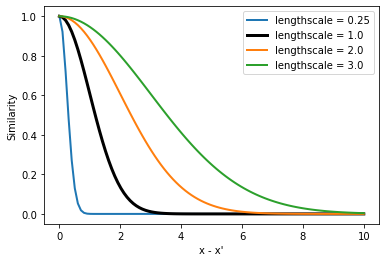

In [32]:
x = np.linspace(0, 10, 100)

x_prime = 0.0

k = lambda x, x_prime, lengthscale: np.exp(-(x - x_prime)**2 / (2 * lengthscale**2) )

lengthscale = 0.25
plt.plot(x, k(x, x_prime, lengthscale), label=f"lengthscale = {lengthscale}", lw=2);

lengthscale = 1.0
plt.plot(x, k(x, x_prime, lengthscale), label=f"lengthscale = {lengthscale}", color="k", lw=3);

lengthscale = 2.0
plt.plot(x, k(x, x_prime, lengthscale), label=f"lengthscale = {lengthscale}", lw=2);

lengthscale = 3.0
plt.plot(x, k(x, x_prime, lengthscale), label=f"lengthscale = {lengthscale}", lw=2);

plt.ylabel("Similarity")
plt.xlabel("x - x'")

plt.legend();

The lengthscale clearly has a big effect on the similarity as a function of $x - x'$.  Let's return to the Mauna Loa example and pick an appropriate lengthscale.

The distance between each data point is roughly 0.1, so let's use that and see how it looks, $\ell = 0.1$. 

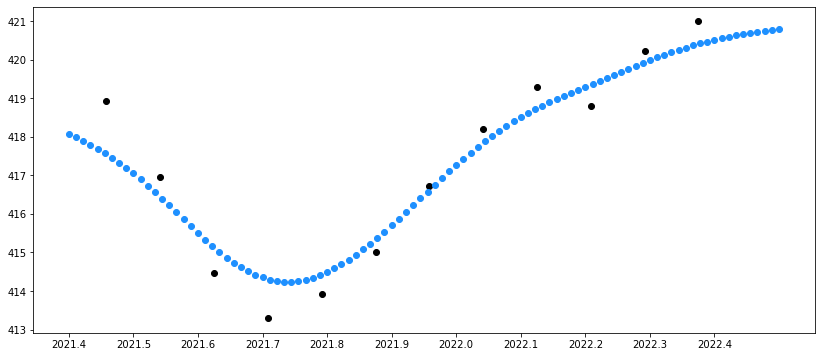

In [33]:
subset = data.sort_values("decimal date").tail(12)

x = subset["decimal date"].values
y = subset["average"].values

fig = plt.figure(figsize=(14, 6))
ax = fig.gca()

ax.plot(x, y, "ok")
ax.set_xticks(np.arange(2021.4, 2022.5, 0.1))

x_primes = np.linspace(2021.4, 2022.5, 100)

for x_prime in x_primes:  ## animate this?
    weights = k(x, x_prime, lengthscale=0.1)
    weights_n = weights / np.sum(weights)
    
    pencil_y = np.sum(y * weights_n)
    
    ax.plot([x_prime], [pencil_y], "o", color="dodgerblue")

Much better!  And much better than we could have done if we had kept going down the route we were originally, with making a functional form for the model of linear + sine + ?.

### Quick notes
* Can we stick with mauna lao dataset and not switch to an artificial one?
* Can we show different versions of bends using exp function in backend?
  * One with high weight, one with low weight
  
* What is in section 40? Maybe we use this to show all the math
  * Call it magic weighting function
  * Expand dots to be proportional to weight
  
  
Things to do
  * Reduce amount of math
 
* Emphasis that unlike functional approach, for each x we more so consider the weight the points aroudn each X, rather than points that are far away

* Focus on influence of each point

### Things bill did great
* Showing length scale in code
* Building intuition about it 
